# Programming Sheet 1: Bayes Decision Theory (40 P)

In this exercise sheet, we will apply Bayes decision theory in the context of small two-dimensional problems. For this, we will make use of 3D plotting. We introduce below the basics for constructing these plots in Python/Matplotlib.

### The function `numpy.meshgrid`

To plot two-dimensional functions, we first need to discretize the two-dimensional input space. One basic function for this purpose is `numpy.meshgrid`. The following code creates a discrete grid of the rectangular surface $[0,4] \times [0,3]$. The function `numpy.meshgrid` takes the discretized intervals as input, and returns two arrays of size corresponding to the discretized surface (i.e. the grid) and containing the X and Y-coordinates respectively.

In [57]:
import numpy
X,Y = numpy.meshgrid([4,5,6,7,8],[0,1,2,3])
print(X)
print(Y)

[[4 5 6 7 8]
 [4 5 6 7 8]
 [4 5 6 7 8]
 [4 5 6 7 8]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


Note that we can iterate over the elements of the grid by zipping the two arrays `X` and `Y` containing each coordinate. The function `numpy.flatten` converts the 2D arrays to one-dimensional arrays, that can then be iterated element-wise.

In [58]:
print(list(zip(X.flatten(),Y.flatten())))

[(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3)]


### 3D-Plotting

To enable 3D-plotting, we first need to load some modules in addition to `matplotlib`:

In [3]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

As an example, we would like to plot the L2-norm function $f(x,y) = \sqrt{x^2 + y^2}$ on the subspace $x,y \in [-4,4]$. First, we create a meshgrid with appropriate size:

In [4]:
R = numpy.arange(-4,4+1e-9,0.1)
X,Y = numpy.meshgrid(R,R)
print(X.shape,Y.shape)

((81, 81), (81, 81))


Here, we have used a discretization with small increments of 0.1 in order to produce a plot with better resolution. The resulting meshgrid has size (81x81), that is, approximately 6400 points. The function $f$ needs to be evaluated at each of these points. This is achieved by applying element-wise operations on the arrays of the meshgrid. The norm at each point of the grid is therefore computed as:

In [5]:
F = (X**2+Y**2)**.5
print(F.shape)

(81, 81)


The resulting function values are of same size as the meshgrid. Taking `X`,`Y`,`F` jointly results in a list of approximately 6400 triplets representing the x-, y-, and z-coordinates in the three-dimensional space where the function should be plotted. The 3d-plot can now be constructed easily by means of the function `scatter` of `matplotlib.pyplot`.

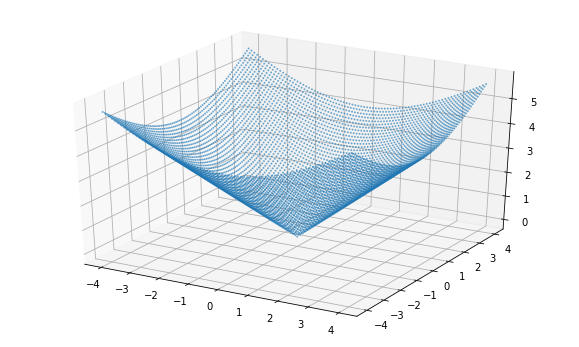

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5)

The parameter `s` and `alpha` control the size and the transparency of each data point. Other 3d plotting variants exist (e.g. surface plots), however, the scatter plot is the simplest approach at least conceptually. Having introduced how to easily plot 3D functions in Python, we can now analyze two-dimensional probability distributions with this same tool.

## Exercise 1: Gaussian distributions (5+5+5 P)

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution with mean vector $\mu = (0,0)$, and covariance matrix $\Sigma = I$ also known as standard normal distribution. We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1). For two-dimensional input spaces, the standard normal distribution is given by:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
This distribution sums to $1$ when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$$
where the sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.**

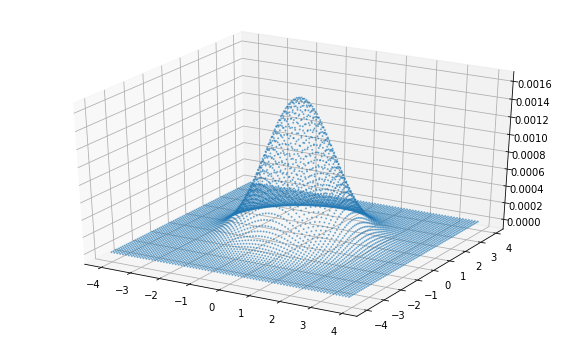

In [115]:
### REPLACE BY YOUR CODE
def plot_distribution(X, Y, F):
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X,Y,F,s=1,alpha=0.5)
def s1a():
    R = numpy.arange(-4, 4, 0.1)
    X, Y = numpy.meshgrid(R, R)
    tmp = numpy.exp((-0.5 * (X**2 + Y**2)))
    Z = numpy.sum(tmp)
    P = tmp/Z
    return X,Y,P
X,Y,P = s1a()
#print numpy.sum(P)
plot_distribution(X, Y, P)
###

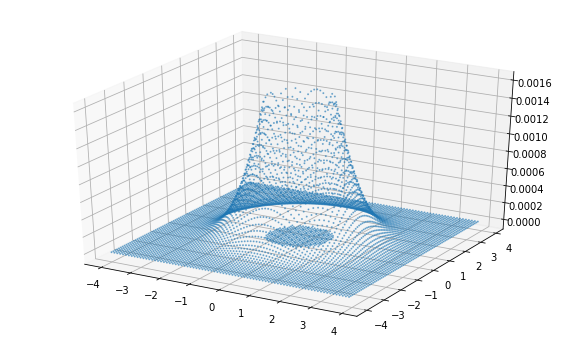

In [80]:
### REPLACE BY YOUR CODE
def s1b():
    R = numpy.arange(-4, 4, 0.1)
    X, Y = numpy.meshgrid(R, R)
    tmp = numpy.exp((-0.5 * (X**2 + Y**2)))
    invalid_X_Y_index = X**2+Y**2 < 1
    tmp[invalid_X_Y_index] = 0
    Z = numpy.sum(tmp)
    Q = tmp/Z
    return X, Y, Q
X, Y, Q = s1b()
#print numpy.sum(Q)
plot_distribution(X, Y, Q)
###

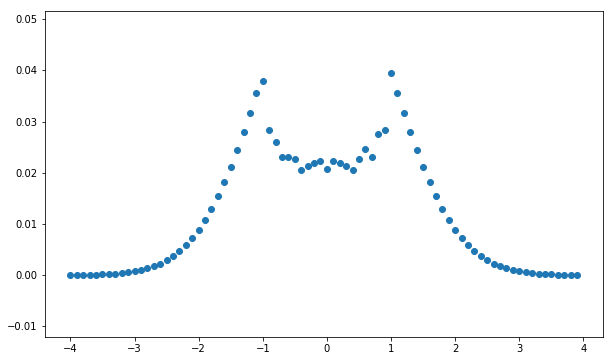

In [88]:
### REPLACE BY YOUR CODE
def s1c():
    X, Y, Q = s1b()
    Y_sum = numpy.sum(Q, axis=1)
    return X[0, :], Y_sum
X, Y_sum = s1c()
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.scatter(X,Y_sum)
###

## Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectively, and same covariance matrix
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

* ** Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the grid), and plot them with different colors.**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes error rate for the discretized case.**

(6400, 2)


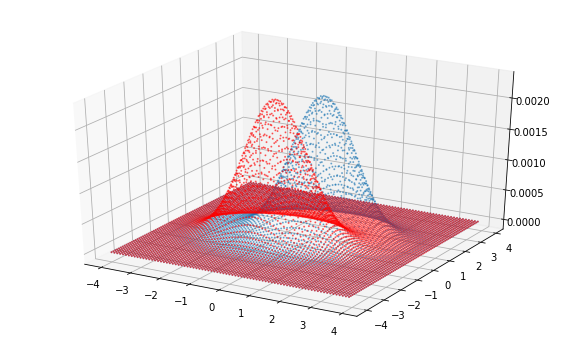

In [175]:
def s2a(covariance_matrix):
    u1 = numpy.array([-0.5, -0.5])
    u2 = numpy.array([0.5, 0.5])
    R = numpy.arange(-4, 4, 0.1)
    x, y = numpy.meshgrid(R, R)
    X_Y = numpy.array(zip(x.flatten(), y.flatten()))
    print X_Y.shape
    tmp1 = numpy.exp(numpy.sum(numpy.dot(-0.5 * (X_Y-u1), numpy.linalg.inv(covariance_matrix)) * (X_Y - u1), axis=1))
    Z1 = numpy.sum(tmp1)
    P_X_w1 = tmp1/Z1
    tmp2 = numpy.exp(numpy.sum(numpy.dot(-0.5 * (X_Y-u2), numpy.linalg.inv(covariance_matrix)) * (X_Y - u2), axis=1))
    Z2 = numpy.sum(tmp2)
    P_X_w2 = tmp2/Z2
    return x, y, P_X_w1, P_X_w2
covariance_matrix = numpy.array([[1.0, 0], [0, 0.5]])
x,y, P_X_w1, P_X_w2 = s2a(covariance_matrix)
# print x.shape, y.shape, P_X_w1.shape
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X.flatten(),Y.flatten(),P_X_w1,s=1,alpha=0.5, color='red')
ax.scatter(X.flatten(),Y.flatten(),P_X_w2,s=1,alpha=0.5)
# plot_distribution(x.flatten(), y.flatten(), P_X_w1)
# plot_distribution(x.flatten(), y.flatten(), P_X_w2)

(6400, 2)


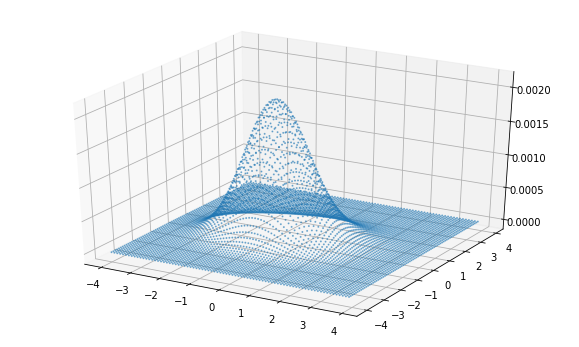

In [176]:
### REPLACE BY YOUR CODE
def s2b(w1, w2, P_X_w1, P_X_w2):
    P_X = P_X_w1 * w1 + P_X_w2 * w2
    return P_X

covariance_matrix = numpy.array([[1.0, 0], [0, 0.5]])
w1 = 0.9
w2 = 0.1
x,y, P_X_w1, P_X_w2 = s2a(covariance_matrix)
P_X = s2b(w1, w2, P_X_w1, P_X_w2)
plot_distribution(x.flatten(), y.flatten(), P_X)
###

(6400, 2)
[  6.82748482e-07   7.54553713e-07   8.33910753e-07 ...,   9.99908845e-01
   9.99917519e-01   9.99925368e-01] [  9.99999317e-01   9.99999245e-01   9.99999166e-01 ...,   9.11546957e-05
   8.24808950e-05   7.46323859e-05]


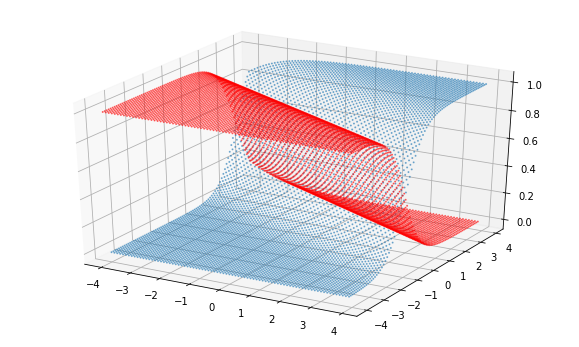

In [177]:
### REPLACE BY YOUR CODE
def s2c(covariance_matrix):
    w1 = 0.9
    w2 = 0.1
    x, y, P_X_w1, P_X_w2 = s2a(covariance_matrix)
    P_X = s2b(w1, w2, P_X_w1, P_X_w2)
    P_w1_X = P_X_w1 * w1 / P_X
    P_w2_X = P_X_w2 * w2 / P_X
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X.flatten(),Y.flatten(),P_w1_X,s=1,alpha=0.5, color='red')
    ax.scatter(X.flatten(),Y.flatten(),P_w2_X,s=1,alpha=0.5)
    P_w1_X_error = P_w2_X
    P_w2_X_error = P_w1_X
    return P_w1_X_error, P_w2_X_error
covariance_matrix = numpy.array([[1.0, 0], [0, 0.5]])
P_w1_X_error, P_w2_X_error = s2c(covariance_matrix)
print P_w1_X_error, P_w2_X_error 

###

## Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e. $\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new covariance matrices, and print the new Bayes error rate.**

(6400, 2)
(6400, 2)
[  6.82748482e-07   7.54553713e-07   8.33910753e-07 ...,   9.99908845e-01
   9.99917519e-01   9.99925368e-01] [  9.99999317e-01   9.99999245e-01   9.99999166e-01 ...,   9.11546957e-05
   8.24808950e-05   7.46323859e-05]
[  1.58351565e-22   2.36232775e-22   3.52417888e-22 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00] [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   9.47755562e-20
   6.35299552e-20   4.25854025e-20]


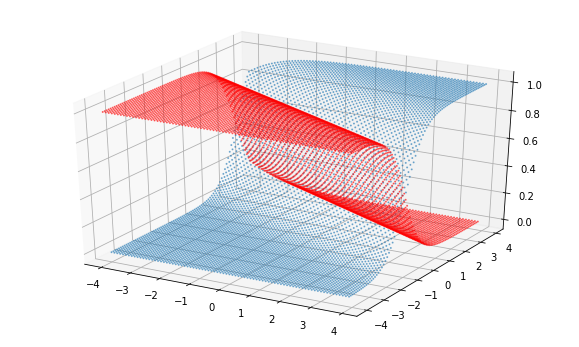

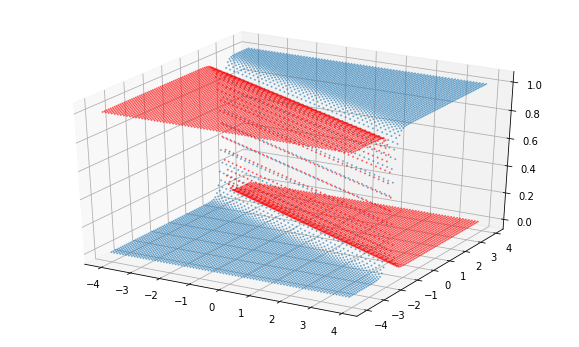

In [178]:
### REPLACE BY YOUR CODE   
covariance_matrix1 = numpy.array([[1.0, 0], [0, 0.5]])

covariance_matrix2 = covariance_matrix1/ 4

P_w1_X_error1, P_w2_X_error1 = s2c(covariance_matrix1)

P_w1_X_error2, P_w2_X_error2 =s2c(covariance_matrix2)

print P_w1_X_error1, P_w2_X_error1
print P_w1_X_error2, P_w2_X_error2
###

Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox.**

I'd like to use 2D-diagrams to explain this. All of the paramters will keep same with above. 


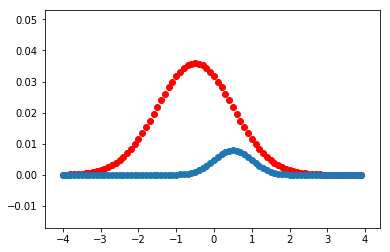

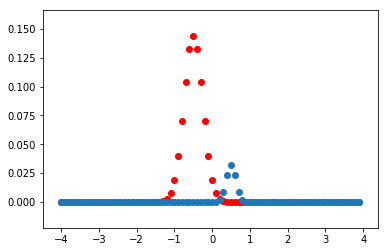

In [188]:
u1 = -0.5
u2 = 0.5
cov1 = 1.0
cov2 = 0.5
w1 = 0.9
w2 = 0.1
def test(u1, u2, cov1, cov2, w1, w2):
    R = numpy.arange(-4, 4, 0.1)
    X = numpy.array(numpy.meshgrid(R))
    tmp1 = numpy.exp(-.5*(X-u1)**2 / cov1**2)
    Z1 = numpy.sum(tmp1)
    p_X_w1 = tmp1/Z1
    
    tmp2 = numpy.exp(-.5*(X-u2)**2 / cov2**2)
    Z2 = numpy.sum(tmp2)
    p_X_w2 = tmp2/Z2
    plt.scatter(X, p_X_w1*w1, color='red') #since the evidence is the same value for the 2 classes, just ignore it here
    plt.scatter(X, p_X_w2*w2)
    plt.show()
    
test(u1, u2, cov1, cov2, w1, w2)
test(u1, u2, cov1/4, cov2/4, w1, w2)

As we could see from above diagrams, for the first diagram, let's concentrate on the interval [0,1]. Inside this area, the uncertainty is larger than other area, since both classes has a large probability here. After we reduced the variance, while the interval in which both classes has a similar probability is becoming much more smaller, it still exists. That's the point.
Come back to the figures of exercise 3, after reduced the variance, we could see a plane crossed by two distributions. That means, the uncertainty becomes largest when the points are in this plane. However, once the point get out of this plane, the prediction uncertainty will decrease to zero really fast. 
To sum up, while we can improve the prediction certainty by reducing variance for the most of data points, we could not reach a full certainty prediction at all cases.